In [2]:
import cv2
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import io
from skimage import io, img_as_float, img_as_ubyte
from skimage.filters import median, gaussian
from skimage.morphology import disk

In [3]:
path = "D:/Hayashi_lab/ALA_DTS/Optogenetics/Olympus_plate/Protocol3/20210903_remEx394_ATR+_protocol4/_6/images/_6_MMStack_Pos0.ome0205.tif"
img = rgb2gray(img_as_float(io.imread(path)))
img

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11083333, 0.11083333, ..., 0.10666667, 0.035     ,
        0.        ],
       [0.        , 0.1025    , 0.105     , ..., 0.10166667, 0.03083333,
        0.        ],
       ...,
       [0.        , 0.12666667, 0.12166667, ..., 0.12166667, 0.04333333,
        0.        ],
       [0.        , 0.125     , 0.12166667, ..., 0.12916667, 0.045     ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

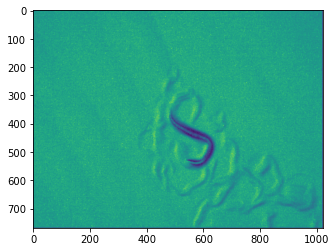

In [4]:
plt.imshow(img)

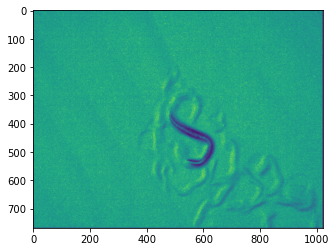

In [22]:
path2 = "D:/Hayashi_lab/ALA_DTS/Optogenetics/Olympus_plate/Protocol3/20210903_remEx394_ATR+_protocol4/_6/images/_6_MMStack_Pos0.ome0206.tif"
img2 = io.imread(path2)
img2= img_as_float(img2)
img2_gray = rgb2gray(img2)
plt.imshow(img2_gray)

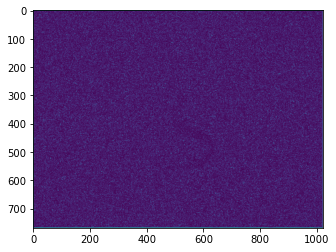

In [23]:
sub = cv2.absdiff(img,img2_gray)
plt.imshow(sub)

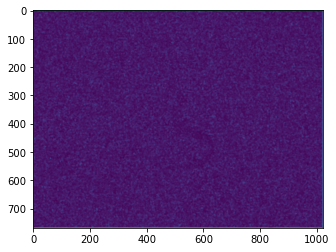

In [24]:
sub = median(sub,disk(3))
plt.imshow(sub)

In [25]:
sub

array([[0.0428498 , 0.0428498 , 0.04410169, ..., 0.02583384, 0.01715128,
        0.0133009 ],
       [0.0428498 , 0.0428498 , 0.0376335 , ..., 0.02013974, 0.01678245,
        0.01678245],
       [0.0428498 , 0.03826697, 0.03131149, ..., 0.01715128, 0.01678245,
        0.01678245],
       ...,
       [0.04998913, 0.0375568 , 0.02316257, ..., 0.0208495 , 0.0208495 ,
        0.0208495 ],
       [0.049238  , 0.0487514 , 0.0375568 , ..., 0.02337705, 0.02171909,
        0.01847034],
       [0.0487514 , 0.049238  , 0.049238  , ..., 0.03055008, 0.02337705,
        0.01765557]])

(array([5.65000e+02, 8.29400e+03, 3.98060e+04, 8.35150e+04, 1.17868e+05,
        1.28018e+05, 1.20568e+05, 9.53370e+04, 6.68380e+04, 4.44910e+04,
        2.99560e+04, 1.78230e+04, 1.05730e+04, 6.61400e+03, 3.62200e+03,
        2.22600e+03, 1.25100e+03, 7.98000e+02, 4.95000e+02, 2.61000e+02,
        2.93000e+02, 1.66000e+02, 1.54000e+02, 1.49000e+02, 1.22000e+02,
        1.88000e+02, 1.99000e+02, 2.45000e+02, 1.52000e+02, 1.60000e+02,
        9.30000e+01, 1.00000e+02, 5.50000e+01, 5.90000e+01, 5.90000e+01,
        8.30000e+01, 1.02000e+02, 1.12000e+02, 1.37000e+02, 1.82000e+02,
        1.46000e+02, 1.53000e+02, 1.90000e+02, 1.49000e+02, 1.40000e+02,
        1.57000e+02, 1.61000e+02, 1.20000e+02, 1.19000e+02, 1.06000e+02,
        6.10000e+01, 9.10000e+01, 5.40000e+01, 6.20000e+01, 3.70000e+01,
        4.10000e+01, 3.00000e+01, 2.00000e+01, 2.30000e+01, 5.00000e+00,
        8.00000e+00, 8.00000e+00, 6.00000e+00, 8.00000e+00, 0.00000e+00,
        8.00000e+00, 8.00000e+00, 5.00000e+00, 8.00

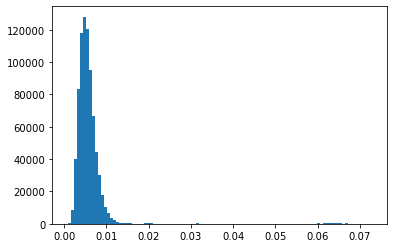

In [26]:
plt.hist(sub.ravel(), bins = 100)

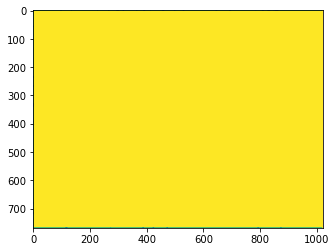

In [27]:
plt.imshow(np.where(sub>0.04, 0, 1))

In [28]:
sub.mean()


0.005805458632253732

In [29]:
sub.std()

0.004265966651182775

In [30]:
threshold = sub.mean() + 5 * sub.std()

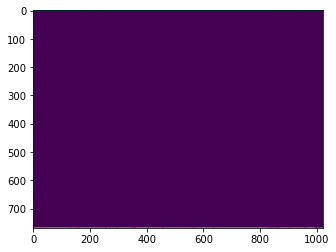

In [31]:
plt.imshow(np.where(sub>threshold, 255, 0))

In [32]:
np.count_nonzero(np.where(sub>threshold, 1, 0))

5191

In [33]:
np.where(sub>threshold, 1,0)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [34]:
img =  cv2.GaussianBlur(img_gray,ksize=(3, 3), sigmaX=0.8)
img2 =  cv2.GaussianBlur(img2_gray,ksize=(3, 3), sigmaX=0.8)

NameError: name 'img_gray' is not defined

In [35]:
sub = cv2.absdiff(img,img2)
threshold = sub.mean() + 5 * sub.std()
plt.imshow(sub)

error: OpenCV(4.5.2) ..\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [36]:
np.count_nonzero(np.where(sub>threshold, 1, 0))

5191

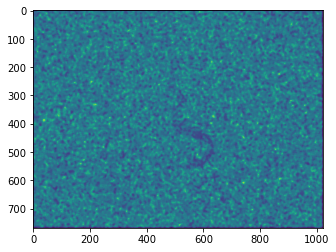

In [37]:
img = rgb2gray(img_as_float(io.imread(path)))
img2 = rgb2gray(img_as_float(io.imread(path2)))
img =  gaussian(img, sigma=0.4)
img2 =  gaussian(img2, sigma=0.4)
sub = cv2.absdiff(img,img2)
sub = median(sub,disk(5))
plt.imshow(sub)

In [38]:
np.count_nonzero(np.where(sub>threshold, 1, 0))





0

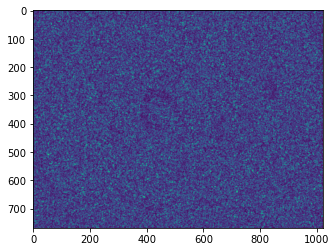

In [51]:
path = "C:/Users/Shinichi/Desktop/test_data_for_Image_Sub/images/img_000000090_Default_000.tif"
path2 = "C:/Users/Shinichi/Desktop/test_data_for_Image_Sub/images/img_000000091_Default_000.tif"

img = rgb2gray(img_as_float(io.imread(path)))
img2 = rgb2gray(img_as_float(io.imread(path2)))
img =  cv2.GaussianBlur(img, (3,3), 1)
img2 =  cv2.GaussianBlur(img2, (3,3), 1)
sub = cv2.absdiff(img,img2)
sub = cv2.GaussianBlur(sub,(3,3), 1)
plt.imshow(sub)
threshold = sub.mean() + 7* sub.std()

In [52]:
np.count_nonzero(np.where(sub>threshold, 1, 0))


5